## Linguagem Natural parte 1: NLP com análise de Sentimento

Vamos criar um analisador de sentimentos, ou seja, um modelo de Machine Learning capaz de analisar um determinado texto e classificá-lo de acordo com o sentimento, se a pessoa gostou ou não do texto. Para isso utilizaremos uma base de dados do IMDb (Internet Movie Database), uma plataforma que reúne dados de filmes, programas, comerciais, música e até de jogos.

Dados disponíveis aqui: https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr?resource=download

In [1]:
import pandas as pd

resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')
resenha

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [2]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                            resenha.sentiment,
                                                            random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression

# reg_log = LogisticRegression()
# reg_log.fit(treino, classe_treino)
# acuracia = reg_log.score(teste, classe_teste)
# print(acuracia)

In [4]:
print("Negativa \n", resenha.text_pt[189])

Negativa 
 Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [5]:
print("Positiva \n", resenha.text_pt[49002])

Positiva 
 Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [6]:
print(resenha.sentiment.value_counts()) # verificar se os dados positivos e negativos estão na mesma proporção

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [7]:
resenha['classificacao'] = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])

In [8]:
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


## Técnica Bag of Words
---

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False) # deixar letras maiúsculas
bag_of_words = vetorizar.fit_transform(texto)

In [10]:
bag_of_words # é uma matriz esparsa (com muitos zeros)

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [11]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [12]:
# Transformar Matriz Esparsa em DataFrame
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [13]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


## Aplicando Bag of Words nos nossos dados
---

In [14]:
vetorizar = CountVectorizer(lowercase=False, max_features=50) # Parametro Max Features para pegar as X palavras que mais aparecem
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [15]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                            resenha.classificacao,
                                                            random_state=42)

reg_log = LogisticRegression(solver='lbfgs')
reg_log.fit(treino, classe_treino)
acuracia = (reg_log.score(teste, classe_teste)) * 100
print("A acuracia foi %.2f%%" % acuracia)                                                        

A acuracia foi 65.83%


In [16]:
# Definindo uma função
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50) # Parametro Max Features para pegar as X palavras que mais aparecem
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                            texto[coluna_classificacao],
                                                            random_state=42)

    reg_log = LogisticRegression(solver='lbfgs')
    reg_log.fit(treino, classe_treino)
    acuracia = (reg_log.score(teste, classe_teste)) * 100
    return acuracia 

In [17]:
classificar_texto(resenha, "text_pt", "classificacao")

65.83097452486858

## WordCloud
---

In [18]:
%matplotlib inline

In [19]:
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [20]:
len(todas_palavras)

63448424

In [21]:
nuvem_palavras = WordCloud(width=800, height=500,
                            max_font_size=110,
                            collocations=False).generate(todas_palavras)

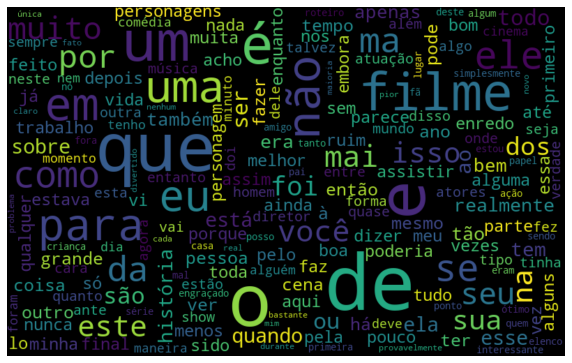

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(nuvem_palavras, interpolation='bilinear') # tornar a imagem mais nítida
plt.axis('off')
plt.show()


In [23]:
resenha.query("sentiment =='pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [24]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500,
                                max_font_size=110,
                                collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,10))
    plt.imshow(nuvem_palavras, interpolation='bilinear') # tornar a imagem mais nítida
    plt.axis('off')
    plt.show()


In [25]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500,
                                max_font_size=110,
                                collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,10))
    plt.imshow(nuvem_palavras, interpolation='bilinear') # tornar a imagem mais nítida
    plt.axis('off')
    plt.show()

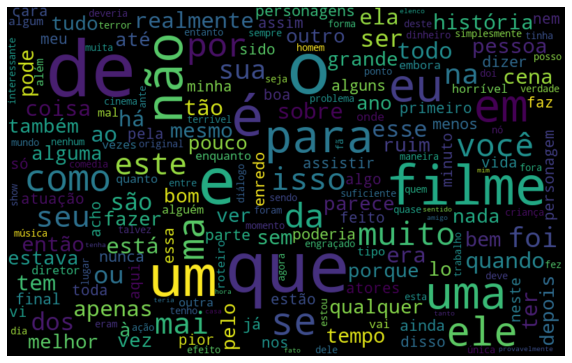

In [26]:
nuvem_palavras_neg(resenha, 'text_pt')

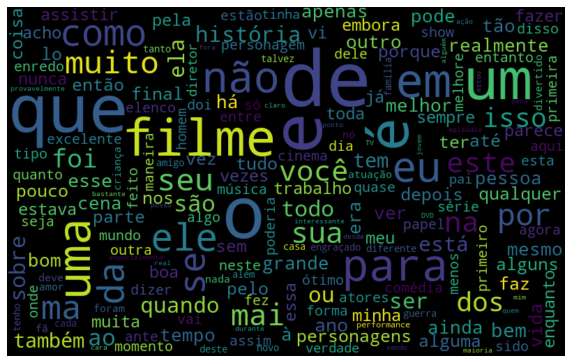

In [27]:
nuvem_palavras_pos(resenha, 'text_pt')

In [28]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/laryssastephanie/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/laryssastephanie/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/laryssastephanie/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/laryssastephanie/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/laryssastephanie/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-

True

In [29]:
import nltk 
frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [30]:
## Separando as frases palavra por palavra

from nltk import tokenize

frase = 'Bem vindo ao mundo do PLN!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [31]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [34]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                            "Frequência": list(frequencia.values())})

In [37]:
# Palavras mais frequentes
df_frequencia.nlargest(columns="Frequência", n=10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


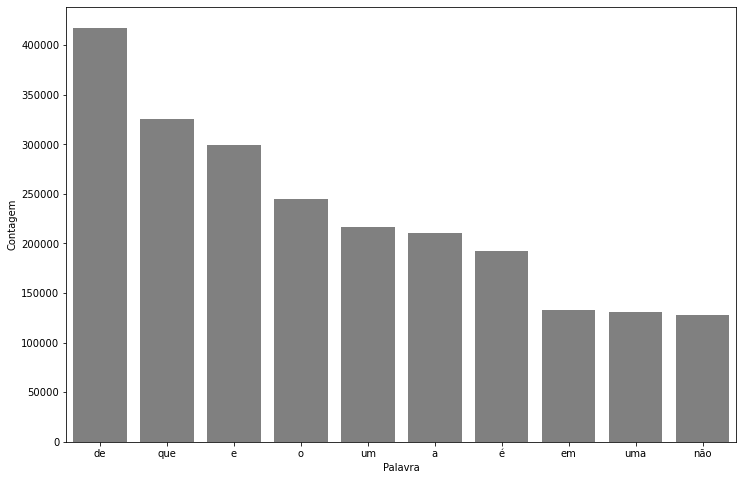

In [39]:
# Gráfico de Pareto

import seaborn as sns

plt.figure(figsize=(12,8))
ax=sns.barplot(data=df_frequencia.nlargest(columns="Frequência", n=10), x="Palavra", y="Frequência", color='gray')
ax.set(ylabel="Contagem")
plt.show()

In [44]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                            "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)

    plt.figure(figsize=(12,8))
    ax=sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", color='gray')
    ax.set(ylabel="Contagem")
    plt.show()

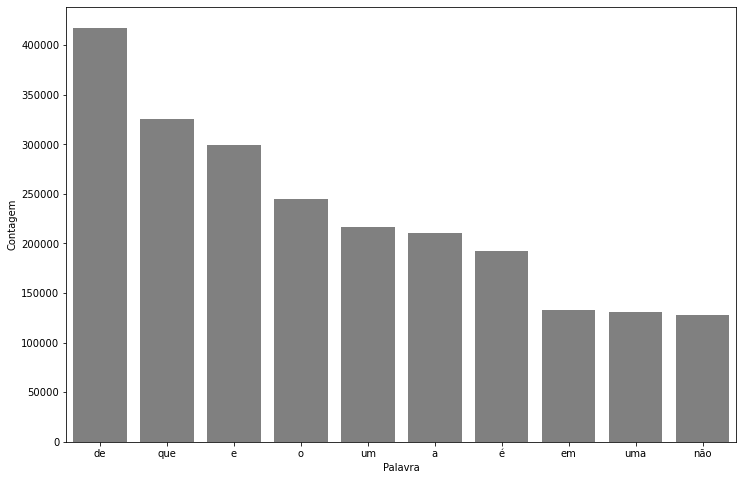

In [45]:
pareto(resenha, 'text_pt', 10)

## Tratamento das palavras - Stop Words
---

In [46]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [47]:
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [48]:
resenha.head() # em cada frase teremos que remover as stop words

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [53]:
frase_processada = []

for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '. join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [54]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [55]:
classificar_texto(resenha, 'tratamento_1', 'classificacao') # após o primeiro tratamento, o resultado melhorou.

68.11160533764658

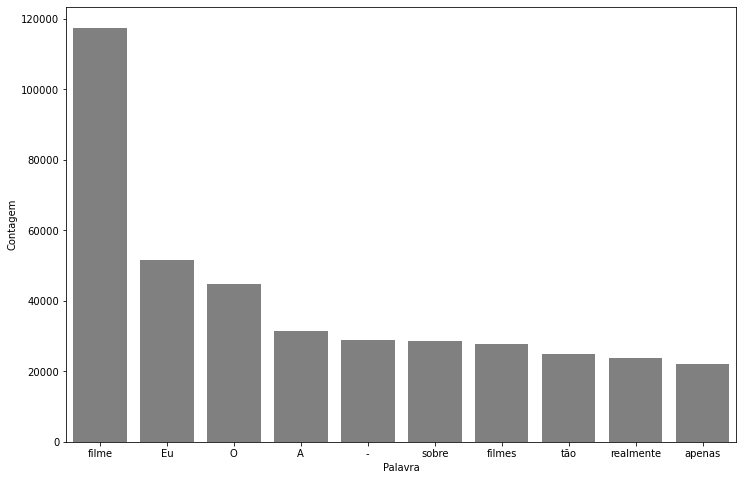

In [56]:
pareto(resenha, 'tratamento_1', 10)

In [ ]:
### Continua na parte 2 do curso...